In [1]:
%%bash 
jupyter nbconvert --to html Exploring_Original_Dataset.ipynb && mv Exploring_Original_Dataset.html ../notebook_htmls/Exploring_Original_Dataset_v1.html


[NbConvertApp] Converting notebook Exploring_Original_Dataset.ipynb to html
[NbConvertApp] Writing 869974 bytes to Exploring_Original_Dataset.html


# Setup

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from IPython.core.debugger import Tracer
import seaborn as sns
%matplotlib inline

# Running the examples

## Example 1

In [17]:

import tensorflow as tf
import sklearn
import h5py
import keras
from keras.preprocessing import image
from resnet50 import ResNet50
from imagenet_utils import preprocess_input, decode_predictions


In [18]:
model = ResNet50(weights='imagenet')

K.image_dim_ordering: tf


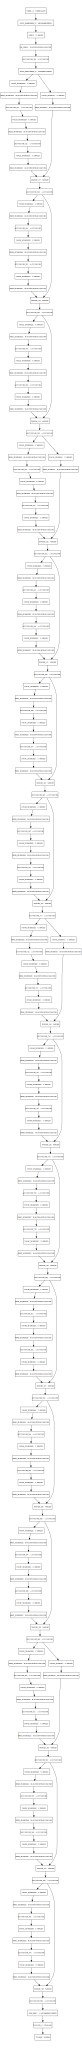

In [19]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [8]:
#model.


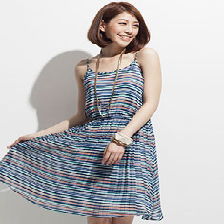

In [19]:

img_path = 'img/euro/EUROMODA-U125256-39-5.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img


In [20]:
x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [21]:
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [23]:
x.shape

(1, 224, 224, 3)

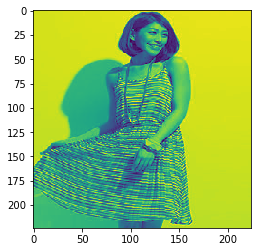

In [27]:
plt.imshow(x[0,:,:,0])

In [31]:
preds = model.predict(x)


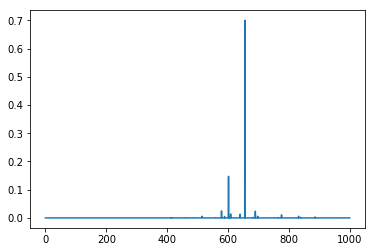

In [54]:
plt.plot(preds.T)

In [32]:
preds.shape

(1, 1000)

In [33]:
print('Predicted:', decode_predictions(preds))
# print: [[u'n02504458', u'African_elephant']]

('Predicted:', [[(u'n03770439', u'miniskirt', 0.70049727), (u'n03534580', u'hoopskirt', 0.14744078), (u'n03450230', u'gown', 0.024755424), (u'n03866082', u'overskirt', 0.023801861), (u'n03594734', u'jean', 0.014014562)]])


## Example 2

In [2]:
from vgg16 import VGG16
from keras.preprocessing import image
from imagenet_utils import preprocess_input

model = VGG16(weights='imagenet', include_top=False)



vgg16.py:79: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", activation="relu", name="block1_conv1")`
  x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block1_conv1')(img_input)
vgg16.py:80: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", activation="relu", name="block1_conv2")`
  x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block1_conv2')(x)
vgg16.py:84: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same", activation="relu", name="block2_conv1")`
  x = Convolution2D(128, 3, 3, activation='relu', border_mode='same', name='block2_conv1')(x)
vgg16.py:85: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same", activation="relu", name="block2_conv2")`
  x = Convolution2D(128, 3, 3, activation='relu', border_mode='same', name='block2_conv2')(x)
vgg16.py:89: UserWar

K.image_dim_ordering: tf


In [3]:
img_path = '1360x.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
x.shape

(1, 224, 224, 3)

In [4]:
features = model.predict(x)
print features

[[[[  0.           0.           0.         ...,   0.           0.           0.        ]
   [  0.           0.           0.         ...,   0.           0.           0.        ]
   [  0.           0.           0.         ...,   0.           0.           0.        ]
   ..., 
   [  0.           0.           0.         ...,   0.           0.           0.        ]
   [  0.           0.           0.         ...,   0.           3.66635823
      0.        ]
   [  0.           0.           0.         ...,   0.          20.83097458
      0.        ]]

  [[  0.           0.           0.         ...,   0.           0.           0.        ]
   [  0.           0.           0.         ...,   0.           0.           0.        ]
   [  0.           0.           0.         ...,   0.           0.           0.        ]
   ..., 
   [  0.           0.           0.         ...,   0.           0.           0.        ]
   [  0.           0.           0.         ...,   0.           0.           0.        ]
   [

In [5]:
features.shape

(1, 7, 7, 512)

In [8]:
## save out instead 
# from keras.utils import plot_model
# plot_model(model, to_file='model.png')

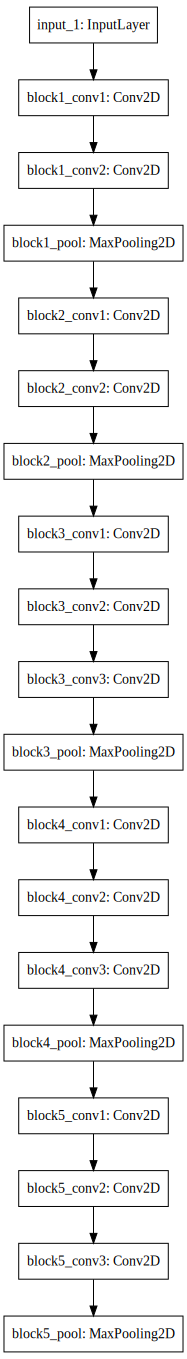

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Example 3

In [9]:
from vgg19 import VGG19
from keras.preprocessing import image
from imagenet_utils import preprocess_input
from keras.models import Model



In [12]:
base_model.input

<tf.Tensor 'input_2:0' shape=(?, ?, ?, 3) dtype=float32>

In [15]:
base_model.get_layer('block5_pool')
# the layers appear to be keras objects. 

In [16]:
base_model.get_layer('block5_pool').output
# input and output appear to be tensorflow tensors. 

<tf.Tensor 'block5_pool_1/MaxPool:0' shape=(?, ?, ?, 512) dtype=float32>

In [17]:
base_model = VGG19(include_top=False, weights='imagenet')
model = Model(input=base_model.input, output=base_model.get_layer('block5_pool').output) 
# this Model creates a model based on some input tensor and some output tensor. 
# here we've taken the base_model, and grabbed it's input layer, and it's 5th output layer, 
# and created a new model with just those layers or is it all the layers inbetween 

K.image_dim_ordering: tf


/Users/chris/anaconda/envs/virtenv/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("bl..., inputs=Tensor("in...)`
  


In [18]:

#img_path = '1360x.jpeg'
img_path = 'img/euro/EUROMODA-U125256-39-5.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

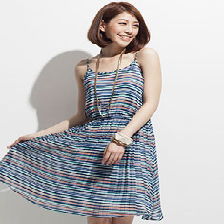

In [19]:
img

In [20]:
block4_pool_features = model.predict(x) # now we predict based on those layers


In [22]:
block4_pool_features.shape # same shape as before. 

(1, 7, 7, 512)

In [26]:
np.shape(block4_pool_features.tolist()[0][0])

(7, 512)

In [29]:
import itertools
flattened_list  = list(itertools.chain(*block4_pool_features.tolist()[0][0])) # * will unpack 


for item in flattened_list: print item

0.0
0.0
0.0
0.0
3.34507751465
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.08420681953
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.28566038609
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.05428695679
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
19.9965000153
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.138743013144
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.63628256321
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.410997182131
0.0
0.0
0.0
0.0
0.0
0.0
34

limit_output extension: Maximum message size of 10000 exceeded with 16331 characters

# His Code

## Batch 3

- python ex3_batch.py $brand
- runs this on each brand 


In [1]:
import numpy as np
from vgg19 import VGG19
from resnet50 import ResNet50
from xception import Xception
from keras.preprocessing import image
from imagenet_utils import preprocess_input
from keras.models import Model
import itertools

Using TensorFlow backend.


In [2]:
def get_middle_layer(img_path):
	img = image.load_img(img_path, target_size=(224, 224))
	x = image.img_to_array(img)
	x = np.expand_dims(x, axis=0)
	x = preprocess_input(x)

	block4_pool_features = model.predict(x)
	flattened_list  = list(itertools.chain(*block4_pool_features.tolist()[0][0]))
	return flattened_list

def dot(K, L):
   if len(K) != len(L):
      return 0
   return sum(i[0] * i[1] for i in zip(K, L))

def similarity(item_1, item_2): 
	return dot(item_1, item_2) / np.sqrt(dot(item_1, item_1) * dot(item_2, item_2))


In [3]:
import os
import sys

base_model = ResNet50(include_top=False, weights='imagenet')
model = Model(input=base_model.input, output=base_model.get_layer('avg_pool').output)

resnet50.py:165: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (7, 7), strides=(2, 2), name="conv1")`
  x = Convolution2D(64, 7, 7, subsample=(2, 2), name='conv1')(x)
resnet50.py:90: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 1), strides=(1, 1), name="res2a_branch2a")`
  name=conv_name_base + '2a')(input_tensor)
resnet50.py:95: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", name="res2a_branch2b")`
  name=conv_name_base + '2b')(x)
resnet50.py:99: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (1, 1), name="res2a_branch2c")`
  x = Convolution2D(nb_filter3, 1, 1, name=conv_name_base + '2c')(x)
resnet50.py:103: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (1, 1), strides=(1, 1), name="res2a_branch1")`
  name=conv_name_base + '1')(input_tensor)
resnet50.py:106: UserWarning: The `merge` function is deprecated and will be removed after 08

limit_output extension: Maximum message size of 10000 exceeded with 10700 characters

In [6]:
path = 'img/baiyi'

features = dict()
for filename in os.listdir(path): # loop through all images in the folder
	img_path = path + '/' + filename
	features[filename] = get_middle_layer(img_path) # get the features from the middle layer 


In [12]:
len(features['Baiyixiuzi-B978N340-5.jpg'])

2048

In [13]:
import itertools
similarities = {item: similarity(features[item[0]], features[item[1]]) for item in itertools.product(features,features)}
for key, item in similarities.items():
	print key[0] + '|' + key[1] + '|' + str(item)

Baiyixiuzi-B978N101-5.jpg|BAIYI-B1061N026-5.jpg|0.823859037591
BAI-B004-3N026-5.jpg|Baiyixiuzi-B942N313-5.jpg|0.648299622
Bai-B520N015-5.jpg|Baiyixiuzi-B942N313-5.jpg|0.840041769387
Baiyixiuzi-B942N313-5.jpg|Baiyixiuzi-B942N315-5.jpg|0.884754758629
B-B1088N409-5.jpg|BAI-B004-3N026-5.jpg|0.747560769344
Baiyixiuzi-B977N037-5.jpg|Bai-B520N015-5.jpg|0.764250298092
Baiyixiuzi-B977N037-5.jpg|BAIYI-B1057N382-5.jpg|0.679682253326
Bai-B520N015-5.jpg|Baiyixiuzi-B978N101-5.jpg|0.775114607128
BAIYI-B1008N299-5.jpg|Baiyixiuzi-B977N060-5.jpg|0.847416065421
BAIYI-B1061N026-5.jpg|BAI-B004-3N026-5.jpg|0.740372238027
B-A406001N004-5.jpg|BAI-B004-3N004-5.jpg|0.815767723995
Baiyixiuzi-B942N315-5.jpg|B-B1088N004-5.jpg|0.721332743827
BAIYI-B1010N356-5.jpg|B-A406001N004-5.jpg|0.704356704643
Baiyixiuzi-B942N313-5.jpg|Baiyixiuzi-B977N037-5.jpg|0.793354199302
Baiyixiuzi-B942N313-5.jpg|Baiyi-B987N026-5.jpg|0.780199081656
Baiyixiuzi-B977N060-5.jpg|BAI-B004-3N026-5.jpg|0.687669768634
B-A406001N004-5.jpg|Baiyixiuzi

limit_output extension: Maximum message size of 10000 exceeded with 23522 characters

In [16]:
similarities

{('B-A406001N004-5.jpg', 'B-A406001N004-5.jpg'): 1.0,
 ('B-A406001N004-5.jpg', 'B-B1088N004-5.jpg'): 0.81056090469981612,
 ('B-A406001N004-5.jpg', 'B-B1088N409-5.jpg'): 0.79583960608883408,
 ('B-A406001N004-5.jpg', 'BAI-B004-3N004-5.jpg'): 0.81576772399522668,
 ('B-A406001N004-5.jpg', 'BAI-B004-3N026-5.jpg'): 0.69669602374807649,
 ('B-A406001N004-5.jpg', 'BAIYI-B1008N289-5.jpg'): 0.67663761081822882,
 ('B-A406001N004-5.jpg', 'BAIYI-B1008N299-5.jpg'): 0.68029326927141098,
 ('B-A406001N004-5.jpg', 'BAIYI-B1010N356-5.jpg'): 0.70435670464269862,
 ('B-A406001N004-5.jpg', 'BAIYI-B1057N382-5.jpg'): 0.60715653253139457,
 ('B-A406001N004-5.jpg', 'BAIYI-B1057N383-5.jpg'): 0.56208795499215936,
 ('B-A406001N004-5.jpg', 'BAIYI-B1061N026-5.jpg'): 0.68490847413743161,
 ('B-A406001N004-5.jpg', 'Bai-B520N015-5.jpg'): 0.82513950472577502,
 ('B-A406001N004-5.jpg', 'Bai-B520N026-5.jpg'): 0.73638317079718996,
 ('B-A406001N004-5.jpg', 'Baiyi-B987N026-5.jpg'): 0.69680544143997858,
 ('B-A406001N004-5.jpg', 'B

limit_output extension: Maximum message size of 10000 exceeded with 29495 characters

## Creating User Vecs

In [130]:
import math
import numpy as np
import pandas as pd
import pickle
import sys
sys.path.append('4.personalization/')
import utils.kmeans as kmeans
from collections import Counter


In [125]:
def average(lists):
    #Tracer()()
    return [np.mean(i) for i in zip(*[l for l in lists])]


In [139]:
def cluster(lists, model):
    #Tracer()()
    user_cluster = kmeans.predict(np.array([l for l in lists]), model)
    user_vec = [0] * model.n_clusters
    for i in user_cluster: user_vec[i] += 1
    return [elem / float(sum(user_vec)) for elem in user_vec]

In [89]:
user_log = pd.read_pickle('4.personalization/data/viewlist_imagef.pkl')


In [124]:
user_vec = user_log.groupby(['user_id', 'dt'])['features'].apply(lambda x: average(x))

/Users/chris/anaconda/envs/virtenv/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `Tracer` is deprecated since version 5.1, directly use `IPython.core.debugger.Pdb.set_trace()`
  


> <ipython-input-123-60a1ef84013a>(3)average()
      1 def average(lists):
      2     Tracer()()
----> 3     return [np.mean(i) for i in zip(*[l for l in lists])]

ipdb> list
      1 def average(lists):
      2     Tracer()()
----> 3     return [np.mean(i) for i in zip(*[l for l in lists])]

ipdb> lists
58589    [0.387, 1.751, 0.032, 0.452, 0.087, 0.361, 1.3...
79516    [0.33, 0.578, 0.013, 0.635, 0.361, 0.026, 0.07...
84702    [0.729, 0.606, 0.021, 2.631, 0.061, 0.292, 1.1...
Name: (17940, 20170308), dtype: object
ipdb> type(lists)
<class 'pandas.core.series.Series'>
ipdb> q
Exiting Debugger.


In [94]:
user_log.groupby(['user_id', 'dt'])

In [100]:
user_log[0:100].groupby(['user_id', 'dt'])['features'].apply(lambda x: x)

In [102]:
f = lambda y: y**2
f(7)

49

In [119]:
#user_log[0:100].groupby(['user_id', 'dt'])['goods_no'].apply(lambda x: x)

In [132]:
model_path='4.personalization/utils/model.pkl'
model = kmeans.load_model(model_path) 


/Users/chris/anaconda/envs/virtenv/lib/python2.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator KMeans from version pre-0.18 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [134]:
type(model)

sklearn.cluster.k_means_.KMeans

In [137]:
model.cluster_centers_.shape

(100, 2048)

In [140]:
user_vec = user_log.groupby(['user_id', 'dt'])['features'].apply(lambda x: cluster(x, model))

In [150]:
len(user_vec[0])

100

# Exploring the Data

- requires the virt-env to be set-up WTF!

In [25]:
buylist = pd.read_pickle('4.personalization/data/buylist_imagef2.pkl')
buylist.head(20)

,user_id,goods_no,spu_id,pkl_path,features
0,17940,S62X0006A121,3918489495497789461,/root/pkl/334/10012320/data.pkl,"[0.329701840878, 0.578402042389, 0.01264389045..."
1,2259196,S62X0006A121,3918489495497789461,/root/pkl/334/10012320/data.pkl,"[0.329701840878, 0.578402042389, 0.01264389045..."
2,5163437,S62X0006A121,3918489495497789461,/root/pkl/334/10012320/data.pkl,"[0.329701840878, 0.578402042389, 0.01264389045..."
3,19899166,S62X0006A121,3918489495497789461,/root/pkl/334/10012320/data.pkl,"[0.329701840878, 0.578402042389, 0.01264389045..."
4,29046753,S62X0006A121,3918489495497789461,/root/pkl/334/10012320/data.pkl,"[0.329701840878, 0.578402042389, 0.01264389045..."
5,31107795,S62X0006A121,3918489495497789461,/root/pkl/334/10012320/data.pkl,"[0.329701840878, 0.578402042389, 0.01264389045..."
6,33715823,S62X0006A121,3918489495497789461,/root/pkl/334/10012320/data.pkl,"[0.329701840878, 0.578402042389, 0.01264389045..."
7,43685589,S62X0006A121,3918489495497789461,/root/pkl/334/10012320/data.pkl,"[0.329701840878, 0.578402042389, 0.01264389045..."
8,50368481,S62X0006A121,3918489495497789461,/root/pkl/334/10012320/data.pkl,"[0.329701840878, 0.578402042389, 0.01264389045..."
9,55679487,S62X0006A121,3918489495497789461,/root/pkl/334/10012320/data.pkl,"[0.329701840878, 0.578402042389, 0.01264389045..."


In [51]:
candidates = pd.read_pickle('4.personalization/data/candidates.pkl')
candidates.head()


,goods_no,spu_id,features
0,S62X0006A121,3918489495497789461,"[0.329701840878, 0.578402042389, 0.01264389045..."
46,S71R0003A28,33290489224151212,"[0.0, 0.0892547890544, 0.00202232715674, 0.494..."
120,S63K0003A7,310261851791720460,"[0.737916231155, 0.934333741665, 0.0, 0.501327..."
156,S63H0267A10,5142964296745125,"[0.446703672409, 1.76493012905, 0.010568439960..."
208,S63U0078A3,2609694530945034,"[0.467104375362, 1.10197365284, 0.009207816794..."


- candiates are items

In [7]:
candidates_cluster = pd.read_pickle('4.personalization/data/candidates_cluster.pkl')
candidates_cluster.head()

,goods_no,spu_id,cluster
0,S62X0006A121,3918489495497789461,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
46,S71R0003A28,33290489224151212,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
120,S63K0003A7,310261851791720460,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
156,S63H0267A10,5142964296745125,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
208,S63U0078A3,2609694530945034,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [8]:
user_vec_average = pd.read_pickle('4.personalization/data/user_vec_average.pkl')
user_vec_average.head()

,user_id,dt,features
0,17940,20170308,"[0.482, 0.978333333333, 0.022, 1.23933333333, ..."
1,193534,20170307,"[0.24025, 0.326125, 0.094875, 0.69475, 0.37137..."
2,205456,20170308,"[0.263666666667, 0.508333333333, 0.00366666666..."
3,251058,20170310,"[0.302692307692, 0.617153846154, 0.04069230769..."
4,307275,20170309,"[0.2045, 0.557, 0.1135, 0.9615, 0.0985, 0.051,..."


- These features are from the images of the previous users. These are the average of the previous images viewed.

In [155]:
user_vec_average_no_pv = pd.read_pickle('4.personalization/data/user_vec_average_no_pv.pkl')
user_vec_average_no_pv.head()

,user_id,dt,features
0,17940,20170308,"[0.482, 0.978333333333, 0.022, 1.23933333333, ..."
1,193534,20170307,"[0.3844, 0.4684, 0.1506, 0.8152, 0.2936, 0.108..."
2,205456,20170308,"[0.263666666667, 0.508333333333, 0.00366666666..."
3,251058,20170310,"[0.316727272727, 0.684818181818, 0.04390909090..."
4,307275,20170309,"[0.2045, 0.557, 0.1135, 0.9615, 0.0985, 0.051,..."


In [152]:
user_vec_cluster = pd.read_pickle('4.personalization/data/user_vec_cluster.pkl')
user_vec_cluster.head()

,user_id,dt,features
0,17940,20170308,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,193534,20170307,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0..."
2,205456,20170308,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,251058,20170310,"[0.0769230769231, 0.153846153846, 0.0, 0.0, 0...."
4,307275,20170309,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, ..."


- These features are from the images of the previous users. These are clusters assigned to each image. In an algorithm later, it's easier to just compare similarities of items within the same cluster (rather than every pairwise image). 

In [154]:
len(user_vec_cluster['features'][0]) 

100

In [13]:
viewlist = pd.read_pickle('4.personalization/data/viewlist_imagef.pkl')


,user_id,dt,goods_no,spu_id,brand_store_sn,formar14_pv,pkl_path,features
0,2081602,20170307,LA12351XBE,8377053158099693598,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.05, 1.234, 0.0, 0.027, 0.321, 0.0, 0.149, 0..."
1,2081602,20170307,LA11769CCW,7951181518336483573,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.097, 0.03, 0.0, 0.299, 0.133, 0.012, 0.239,..."
2,26471171,20170313,LA11769CCW,7951181518336483573,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.097, 0.03, 0.0, 0.299, 0.133, 0.012, 0.239,..."
3,93533432,20170310,LA11769CCW,7951181518336483573,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.097, 0.03, 0.0, 0.299, 0.133, 0.012, 0.239,..."
4,94356672,20170307,LA11769CCW,7951181518336483573,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.097, 0.03, 0.0, 0.299, 0.133, 0.012, 0.239,..."


In [14]:
viewlist.head(100)

,user_id,dt,goods_no,spu_id,brand_store_sn,formar14_pv,pkl_path,features
0,2081602,20170307,LA12351XBE,8377053158099693598,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.05, 1.234, 0.0, 0.027, 0.321, 0.0, 0.149, 0..."
1,2081602,20170307,LA11769CCW,7951181518336483573,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.097, 0.03, 0.0, 0.299, 0.133, 0.012, 0.239,..."
2,26471171,20170313,LA11769CCW,7951181518336483573,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.097, 0.03, 0.0, 0.299, 0.133, 0.012, 0.239,..."
3,93533432,20170310,LA11769CCW,7951181518336483573,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.097, 0.03, 0.0, 0.299, 0.133, 0.012, 0.239,..."
4,94356672,20170307,LA11769CCW,7951181518336483573,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.097, 0.03, 0.0, 0.299, 0.133, 0.012, 0.239,..."
5,94356672,20170307,LA11769CCW,7951181518336483573,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.097, 0.03, 0.0, 0.299, 0.133, 0.012, 0.239,..."
6,94356672,20170307,LA11769CCW,7951181518336483573,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.097, 0.03, 0.0, 0.299, 0.133, 0.012, 0.239,..."
7,94356672,20170307,LA11769CCW,7951181518336483573,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.097, 0.03, 0.0, 0.299, 0.133, 0.012, 0.239,..."
8,127228744,20170307,LA11769CCW,7951181518336483573,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.097, 0.03, 0.0, 0.299, 0.133, 0.012, 0.239,..."
9,190085911,20170311,LA11769CCW,7951181518336483573,10010460,2,/root/pickle/334/10010460/data.pkl,"[0.097, 0.03, 0.0, 0.299, 0.133, 0.012, 0.239,..."


limit_output extension: Maximum message size of 10000 exceeded with 18882 characters

In [29]:
viewlist_exp = pd.read_pickle('4.personalization/data/viewlist_imagef_exp.pkl')

,user_id,dt,goods_no,spu_id,brand_store_sn,formar14_pv,pkl_path,features
0,2081602,20170307,LA12351XBE,8377053158099693598,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.05, 1.234, 0.0, 0.027, 0.321, 0.0, 0.149, 0..."
1,2081602,20170307,LA11769CCW,7951181518336483573,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.097, 0.03, 0.0, 0.299, 0.133, 0.012, 0.239,..."
2,26471171,20170313,LA11769CCW,7951181518336483573,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.097, 0.03, 0.0, 0.299, 0.133, 0.012, 0.239,..."
3,93533432,20170310,LA11769CCW,7951181518336483573,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.097, 0.03, 0.0, 0.299, 0.133, 0.012, 0.239,..."
4,94356672,20170307,LA11769CCW,7951181518336483573,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.097, 0.03, 0.0, 0.299, 0.133, 0.012, 0.239,..."


In [60]:
viewlist_exp.head(100)

,user_id,dt,goods_no,spu_id,brand_store_sn,formar14_pv,pkl_path,features
0,2081602,20170307,LA12351XBE,8377053158099693598,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.05, 1.234, 0.0, 0.027, 0.321, 0.0, 0.149, 0..."
1,2081602,20170307,LA11769CCW,7951181518336483573,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.097, 0.03, 0.0, 0.299, 0.133, 0.012, 0.239,..."
2,26471171,20170313,LA11769CCW,7951181518336483573,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.097, 0.03, 0.0, 0.299, 0.133, 0.012, 0.239,..."
3,93533432,20170310,LA11769CCW,7951181518336483573,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.097, 0.03, 0.0, 0.299, 0.133, 0.012, 0.239,..."
4,94356672,20170307,LA11769CCW,7951181518336483573,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.097, 0.03, 0.0, 0.299, 0.133, 0.012, 0.239,..."
5,94356672,20170307,LA11769CCW,7951181518336483573,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.097, 0.03, 0.0, 0.299, 0.133, 0.012, 0.239,..."
6,94356672,20170307,LA11769CCW,7951181518336483573,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.097, 0.03, 0.0, 0.299, 0.133, 0.012, 0.239,..."
7,94356672,20170307,LA11769CCW,7951181518336483573,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.097, 0.03, 0.0, 0.299, 0.133, 0.012, 0.239,..."
8,127228744,20170307,LA11769CCW,7951181518336483573,10010460,1,/root/pickle/334/10010460/data.pkl,"[0.097, 0.03, 0.0, 0.299, 0.133, 0.012, 0.239,..."
9,190085911,20170311,LA11769CCW,7951181518336483573,10010460,2,/root/pickle/334/10010460/data.pkl,"[0.097, 0.03, 0.0, 0.299, 0.133, 0.012, 0.239,..."


limit_output extension: Maximum message size of 10000 exceeded with 18933 characters

- Expanded view list does something with the 'expand browses' and uses formar14_pv. 
- For instances 2597.. had formar14 =4 so the expanded list repeated that row 4 times. 

### Descriptive Statistics

In [59]:
print('rows in buylist: {0}').format(str(len(buylist)))
print('rows in  viewlsit: {0}').format(str(len(viewlist)))
print('rows in  viewlsit expanded: {0}').format(str(len(viewlist_exp)))
print('rows in  candidates: {0}').format(str(len(candidates)))
print('rows in  candidates cluster: {0}').format(str(len(candidates)))
print('rows in  user_vec_average: {0}').format(str(len(user_vec_average)))


rows in buylist: 7506
rows in  viewlsit: 90264
rows in  viewlsit expanded: 155760
rows in  candidates: 226
rows in  candidates cluster: 226
rows in  user_vec_average: 5163


In [45]:
print('number of users in buylist: {0}').format(str(len(set(buylist.user_id.unique()))))
print('number of users in viewlist: {0}').format(str(len(set(viewlist.user_id.unique()))))
print('number of users in both sets: {0}').format(str(len(set(buylist.user_id.unique()).intersection(set(viewlist.user_id.unique())))))

number of users in buylist: 6551
number of users in viewlist: 5133
number of users in both sets: 4157


In [46]:
print('number of goods in buylist: {0}').format(str(len(set(buylist.goods_no.unique()))))
print('number of goods in viewlist: {0}').format(str(len(set(viewlist.goods_no.unique()))))
print('number of goods in both sets: {0}').format(str(len(set(buylist.goods_no.unique()).intersection(set(viewlist.goods_no.unique())))))

number of goods in buylist: 226
number of goods in viewlist: 9863
number of goods in both sets: 218


Same number of goods in candidates list as in the buylist
Maybe these are the ones used for recommendations? 

In [58]:
viewlist.features[3000]

He has features for all 9863 goods. Does he have the images for those? 

### Sessions? 

Also where are the person's locations in the database? 
- are these individual sessions for the same user? 

In [69]:
for uid in viewlist_exp.user_id.unique():
    print('user: {0}').format(uid)
    indices = viewlist_exp.loc[viewlist_exp.user_id==uid].index.tolist()
    print('places in database: {0}').format(indices)
    print('')

user: 2081602
places in database: [0, 1, 16, 27, 28, 29, 30531, 30532, 30889, 30890, 30891, 30984, 31004, 31015, 31028, 34136, 38488, 38492, 38610, 79836, 79837, 79838, 79839, 116105, 116106, 116116, 116119, 116120, 116198, 116200]

user: 26471171
places in database: [2, 241, 1369, 1370, 1371, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1825, 1889, 1896, 1897, 1916, 1930, 27027, 27028, 27029, 27030, 31420, 31566, 32246, 32247, 58527, 83472, 111770, 112586, 135362, 135363, 135364]

user: 93533432
places in database: [3, 1855, 31291, 31292, 90736, 90737, 90822, 143968, 143969, 143970, 144161]

user: 94356672
places in database: [4, 5, 6, 7, 503, 504, 505, 506, 1107, 1108, 1109, 1110, 1150, 1151, 1152, 1153, 1449, 1450, 1451, 1452, 2690, 2691, 2692, 2693, 2725, 2726, 2727, 2728, 31451, 31452, 31453, 31454, 69811, 69812, 69813, 69814]

user: 127228744
places in database: [8, 761, 1261, 1262, 2584, 3356, 57825, 57826, 70556, 73966, 7

limit_output extension: Maximum message size of 10000 exceeded with 68262 characters

In [157]:
#viewlist.dt

What are the item views for each person? 


In [161]:
uid = 18318014
indices = viewlist_exp.loc[viewlist_exp.user_id==uid].index.tolist()
indexlast = -1
print('single user: {0}').format(uid)
for index in indices:
    # find product 
    if index-indexlast>1:
        print('')
        #print('new session')
    print('row {0}, good number {1}  date {2}').format(index,viewlist_exp.loc[index,'goods_no'],viewlist_exp.loc[index,'dt'])
    indexlast = index.copy()

    

single user: 18318014

row 30, good number LA10637QC9  date 20170308

row 1137, good number LN11168QCB  date 20170308

row 38314, good number MA19QL259963  date 20170308

row 40683, good number MA19QL216545  date 20170308

row 56910, good number 523870681  date 20170308

row 57068, good number 7WP168340HOB  date 20170308

row 57977, good number 6W171036BDYH  date 20170308

row 58237, good number 6W196738HDBT  date 20170308
row 58238, good number 6W196738HDBT  date 20170308
row 58239, good number 6W196738HDBT  date 20170308

row 60320, good number 6W17113QHUI  date 20170308

row 60643, good number 6WP175005LV  date 20170308

row 63276, good number 6W189643KQ  date 20170308

row 65247, good number 12390026HEI  date 20170308

row 65357, good number 7W1611169HEI  date 20170308

row 65360, good number 12390026BAI  date 20170308

row 80085, good number YX632117W05  date 20170308

row 90449, good number B16DY10646X29  date 20170308

row 98069, good number C17LD8611HUI01  date 20170308


### Dates

In [171]:
dates_per_user = np.array([])
for uid in viewlist_exp.user_id.unique():
    dates_per_user = np.append(dates_per_user,len(viewlist_exp.loc[viewlist_exp.user_id==uid,'dt'].unique()))

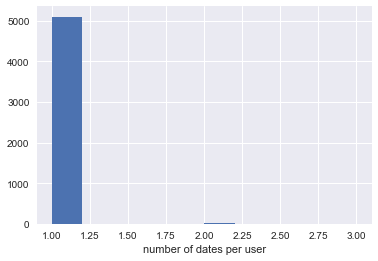

In [177]:
plt.hist(dates_per_user)
sns.despine()
plt.xlabel('number of dates per user')

In [170]:
dates_per_user

array([ 20170307.,  20170313.,  20170310., ...,  20170308.,  20170307.,
        20170311.])

In [166]:
viewlist_exp.dt.unique()

array([20170307, 20170313, 20170310, 20170311, 20170309, 20170308, 20170312])